In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
start_date = '2003-01-01'
end_date = '2015-12-31'

In [3]:
gold_data = yf.download('GC=F', start_date, end_date)
silver_data = yf.download('SI=F', start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
c1_data = yf.download('ABX.TO', start_date, end_date)
c2_data = yf.download('FM.TO', start_date, end_date)
c3_data = yf.download('K.TO', start_date, end_date)
c4_data = yf.download('KL.TO', start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
us_market_data = yf.download('SPX', start_date, end_date)
can_market_data = yf.download('^GSPTSE', start_date, end_date)
cad_data = yf.download('USDCAD=X', start_date, end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
gold_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-01-02,346.100006,346.100006,346.100006,346.100006,346.100006,3
2003-01-03,345.200012,351.200012,345.200012,351.200012,351.200012,0
2003-01-06,351.700012,351.700012,351.100006,351.700012,351.700012,2
2003-01-07,349.299988,349.299988,347.299988,347.299988,347.299988,4
2003-01-08,346.799988,353.899994,346.299988,353.899994,353.899994,0


In [7]:
def preprocess(df):
    to_return = df.copy()
    to_return['pct_change'] = (to_return.Close - to_return.Open)/to_return.Open
    to_return['change_d1'] = (to_return.Open - to_return.shift(1).Open)/to_return.shift(1).Open
    to_return['change_d2'] = (to_return.Open - to_return.shift(2).Open)/to_return.shift(2).Open
    to_return['change_d3'] = (to_return.Open - to_return.shift(3).Open)/to_return.shift(3).Open
    return to_return

def preprocess_metals(df):
    to_return = preprocess(df)
    to_return['Close_l1'] = to_return['Close'].shift(1)
    to_return['Close_l2'] = to_return['Close'].shift(2)
    to_return['pct_change_l1'] = to_return['pct_change'].shift(1)
    to_return['pct_change_l2'] = to_return['pct_change'].shift(2)
    
    return to_return.dropna()

def preprocess_stocks(df):
    to_return = preprocess(df)
    
    to_return['pct_change_l1'] = to_return['pct_change'].shift(1)
    to_return['pct_change_l2'] = to_return['pct_change'].shift(2)
    to_return['Volume_l1'] = to_return['Volume'].shift(1)
    to_return['Volume_l2'] = to_return['Volume'].shift(2)
    
    to_return.loc['2003-01-24':]
    
    return to_return.dropna()

def preprocess_market(df):
    to_return = preprocess(df)
    
    to_return['pct_change_l1'] = to_return['pct_change'].shift(1)
    to_return['pct_change_l2'] = to_return['pct_change'].shift(2)
    to_return['vol'] = (to_return['High'] - to_return['Low'])/to_return['Low']
    to_return['vol_w5'] = (to_return['High'].rolling(5).max() - to_return['Low'].rolling(5).max())/ to_return['Low'].rolling(5).max()
    
    return to_return.dropna()


In [8]:
gold_data = preprocess_metals(gold_data)
silver_data = preprocess_metals(silver_data)

c1_data = preprocess_stocks(c1_data)
c2_data = preprocess_stocks(c2_data)
c3_data = preprocess_stocks(c3_data)
c4_data = preprocess_stocks(c4_data)

us_market_data = preprocess_market(us_market_data)
can_market_data = preprocess_market(can_market_data)
cad_data = preprocess_market(cad_data)


In [9]:
c2_data

,Open,High,Low,Close,Adj Close,Volume,pct_change,change_d1,change_d2,change_d3,pct_change_l1,pct_change_l2,Volume_l1,Volume_l2
Date,,,,,,,,,,,,,,
2003-01-07,0.73,0.730,0.73,0.730,0.669128,4000,0.000000,-0.018817,-0.008152,-0.002732,0.005376,0.000000,42000.0,467500.0
2003-01-08,0.74,0.740,0.74,0.740,0.678294,59500,0.000000,0.013699,-0.005376,0.005435,0.000000,0.005376,4000.0,42000.0
2003-01-09,0.74,0.740,0.72,0.720,0.659962,19000,-0.027027,0.000000,0.013699,-0.005376,0.000000,0.000000,59500.0,4000.0
2003-01-10,0.73,0.748,0.73,0.748,0.685627,227000,0.024658,-0.013514,-0.013514,0.000000,-0.027027,0.000000,19000.0,59500.0
2003-01-13,0.74,0.760,0.74,0.750,0.687460,309500,0.013514,0.013699,0.000000,0.000000,0.024658,-0.027027,227000.0,19000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-22,4.76,5.240,4.66,5.120,5.091084,6267700,0.075630,0.012766,0.158151,0.223650,0.023404,0.119221,6803800.0,15601300.0
2015-12-23,5.32,6.200,5.25,6.000,5.966115,14746100,0.127820,0.117647,0.131915,0.294404,0.075630,0.023404,6267700.0,6803800.0
2015-12-24,5.93,6.040,5.52,5.810,5.777188,3045400,-0.020236,0.114662,0.245798,0.261702,0.127820,0.075630,14746100.0,6267700.0


In [10]:
gold_data

,Open,High,Low,Close,Adj Close,Volume,pct_change,change_d1,change_d2,change_d3,Close_l1,Close_l2,pct_change_l1,pct_change_l2
Date,,,,,,,,,,,,,,
2003-01-07,349.299988,349.299988,347.299988,347.299988,347.299988,4,-0.005726,-0.006824,0.011877,0.009246,351.700012,351.200012,0.000000,0.017381
2003-01-08,346.799988,353.899994,346.299988,353.899994,353.899994,0,0.020473,-0.007157,-0.013932,0.004635,347.299988,351.700012,-0.005726,0.000000
2003-01-09,353.299988,353.299988,353.299988,353.299988,353.299988,2,0.000000,0.018743,0.011451,0.004549,353.899994,347.299988,0.020473,-0.005726
2003-01-10,354.200012,354.500000,354.200012,354.500000,354.500000,1,0.000847,0.002547,0.021338,0.014028,353.299988,353.899994,0.000000,0.020473
2003-01-13,352.000000,354.700012,352.000000,354.700012,354.700012,0,0.007670,-0.006211,-0.003680,0.014994,354.500000,353.299988,0.000847,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-24,1074.300049,1077.800049,1073.500000,1077.199951,1077.199951,24,0.002699,-0.000186,-0.003987,0.003831,1069.400024,1074.800049,-0.004746,-0.003523
2015-12-28,1077.900024,1098.800049,1070.500000,1070.500000,1070.500000,361,-0.006865,0.003351,0.003164,-0.000649,1077.199951,1069.400024,0.002699,-0.004746
2015-12-29,1079.099976,1079.699951,1077.500000,1077.500000,1077.500000,252,-0.001483,0.001113,0.004468,0.004281,1070.500000,1077.199951,-0.006865,0.002699


In [11]:
us_market_data.head()

,Open,High,Low,Close,Adj Close,Volume,pct_change,change_d1,change_d2,change_d3,pct_change_l1,pct_change_l2,vol,vol_w5
Date,,,,,,,,,,,,,,
2003-02-21,0.49967,0.49967,0.49967,0.49967,0.49967,0,0.000000,0.00000,-0.428570,-0.199990,0.000000,0.000000,0.00000,0.00000
2003-03-05,0.49967,0.49967,0.49967,0.49967,0.49967,20,0.000000,0.00000,0.000000,-0.428570,0.000000,0.000000,0.00000,0.00000
2003-03-07,0.74950,0.74950,0.49967,0.49967,0.49967,11067,-0.333329,0.49999,0.499990,0.499990,0.000000,0.000000,0.49999,0.00000
2003-03-10,0.37475,0.37475,0.37475,0.37475,0.37475,40,0.000000,-0.50000,-0.250005,-0.250005,-0.333329,0.000000,0.00000,0.49999
2003-03-11,0.37475,0.37475,0.37475,0.37475,0.37475,0,0.000000,0.00000,-0.500000,-0.250005,0.000000,-0.333329,0.00000,0.49999


In [12]:
metal_cols = ['Open', 'pct_change_l1', 'pct_change_l2', 'change_d1', 'change_d2', 'change_d3', 'Close_l1', 'Close_l2']
metals_data = pd.merge(gold_data[metal_cols], silver_data[metal_cols], left_index=True, right_index=True, suffixes=('_gold', '_silver'))

In [13]:
market_cols = ['Open', 'pct_change_l1', 'pct_change_l2', 'change_d1', 'change_d2', 'change_d3', 'vol', 'vol_w5']
market_data_temp = pd.merge(us_market_data[market_cols], can_market_data[market_cols], left_index=True, right_index=True, suffixes=('_usm', '_canm'))
market_data = pd.merge(market_data_temp, cad_data[market_cols].add_suffix('_cad'), left_index=True, right_index=True)


In [14]:
all_other_data = pd.merge(metals_data, market_data, left_index=True, right_index=True, suffixes=('', ''))

In [15]:
def merge_company_data(df):
    cols = ['Open', 'change_d1', 'change_d2', 'change_d3', 'pct_change_l1', 'pct_change_l2', 'Volume_l1', 'Volume_l2']
    to_return = pd.merge(df[cols], all_other_data, left_index=True, right_index=True)
    return to_return.dropna(how='any')

In [16]:
c1_data_m = merge_company_data(c1_data)
c2_data_m = merge_company_data(c2_data)
c3_data_m = merge_company_data(c3_data)
c4_data_m = merge_company_data(c4_data)

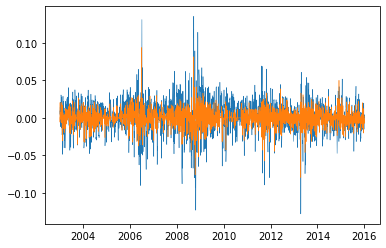

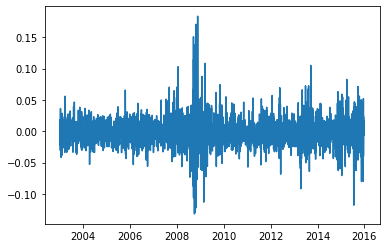

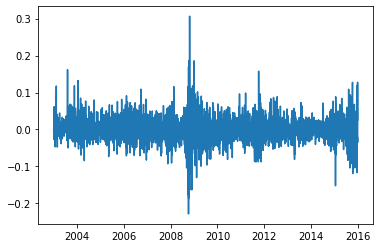

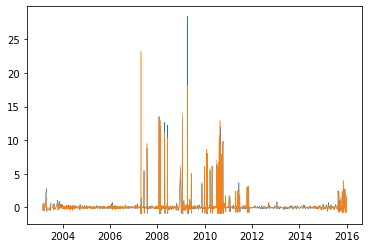

In [17]:
plt.plot(gold_data.index, gold_data['change_d3'], linewidth=0.5)
plt.plot(gold_data.index, gold_data['pct_change_l1'], linewidth=0.5)
plt.show()

plt.plot(c1_data.index, c1_data['pct_change'])
plt.show()

plt.plot(c2_data.index, c2_data['pct_change'])
plt.show()

plt.plot(us_market_data.index, us_market_data['change_d3'], linewidth=0.5)
plt.plot(us_market_data.index, us_market_data['change_d1'],  linewidth=0.5)
plt.show()

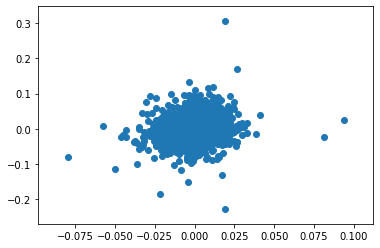

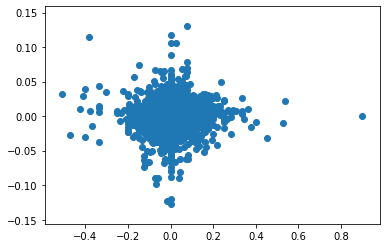

In [18]:
plt.scatter(c2_data_m.pct_change_l1_gold, c2_data_m.pct_change_l1)
plt.show()

plt.scatter(c2_data_m.pct_change_l2_usm, c2_data_m.change_d3_gold)
plt.show()


In [19]:
from sklearn import linear_model

/Users/prateekagarwal2/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [63]:
regr = linear_model.LinearRegression()
y = c1_data.Close.pct_change(1).loc[c1_data_m.index]

date = '2014-06-01'
X_train = c1_data_m.loc[c1_data_m.index < date]
y_train = y.loc[y.index < date]

X_test = c1_data_m.loc[c1_data_m.index >= date]
y_test = y.loc[y.index >= date]

In [64]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
y_predicted = regr.predict(X_test)

In [66]:
results = pd.DataFrame()
results['actual'] = y_test
results['predicted'] = y_predicted
results.index = y_test.index
results

,actual,predicted
Date,,
2014-06-02,-0.014773,-0.007695
2014-06-03,0.005767,-0.001458
2014-06-04,-0.002294,0.000630
2014-06-05,0.009195,0.008042
2014-06-10,0.017222,0.009843
...,...,...
2015-12-17,-0.079772,-0.059801
2015-12-18,0.041280,0.015260
2015-12-21,0.034688,0.019659


In [67]:
import plotly.express as px
fig = px.line(results, x=results.index, y=['actual', 'predicted'])
fig.show()

In [36]:
X_train.columns

Index(['Open', 'change_d1', 'change_d2', 'change_d3', 'pct_change_l1',
       'pct_change_l2', 'Volume_l1', 'Volume_l2', 'Open_gold',
       'pct_change_l1_gold', 'pct_change_l2_gold', 'change_d1_gold',
       'change_d2_gold', 'change_d3_gold', 'Close_l1_gold', 'Close_l2_gold',
       'Open_silver', 'pct_change_l1_silver', 'pct_change_l2_silver',
       'change_d1_silver', 'change_d2_silver', 'change_d3_silver',
       'Close_l1_silver', 'Close_l2_silver', 'Open_usm', 'pct_change_l1_usm',
       'pct_change_l2_usm', 'change_d1_usm', 'change_d2_usm', 'change_d3_usm',
       'vol_usm', 'vol_w5_usm', 'Open_canm', 'pct_change_l1_canm',
       'pct_change_l2_canm', 'change_d1_canm', 'change_d2_canm',
       'change_d3_canm', 'vol_canm', 'vol_w5_canm', 'Open_cad',
       'pct_change_l1_cad', 'pct_change_l2_cad', 'change_d1_cad',
       'change_d2_cad', 'change_d3_cad', 'vol_cad', 'vol_w5_cad'],
      dtype='object')

In [79]:
regr2 = linear_model.LinearRegression()
y = c2_data.Close.pct_change(5).loc[c2_data_m.index].shift(-5)

date = '2014-06-01'
X_train = c2_data_m.loc[c2_data_m.index < date]
y_train = y.loc[y.index < date]

X_test = c2_data_m.loc[c2_data_m.index >= date]
y_test = y.loc[y.index >= date]

In [80]:
regr2.fit(X_train, y_train)
y_predicted = regr2.predict(X_test)
results = pd.DataFrame()
results['actual'] = y_test
results['predicted'] = y_predicted
results.index = y_test.index
results

,actual,predicted
Date,,
2014-06-02,-0.009941,0.002246
2014-06-03,-0.018265,0.000643
2014-06-04,-0.003227,-0.021727
2014-06-05,0.000925,-0.012404
2014-06-10,-0.026508,0.011342
...,...,...
2015-12-17,NaN,0.083351
2015-12-18,NaN,0.059868
2015-12-21,NaN,0.087395


In [81]:
fig = px.line(results, x=results.index, y=['actual', 'predicted'])
fig.show()

In [74]:
y_test.shift(-5)

Date
2014-06-02    0.001371
2014-06-03   -0.018713
2014-06-04    0.005581
2014-06-05    0.001388
2014-06-10   -0.016166
                ...   
2015-12-17         NaN
2015-12-18         NaN
2015-12-21         NaN
2015-12-23         NaN
2015-12-29         NaN
Name: Close, Length: 216, dtype: float64